# Example 3 - Parallel Inclined Layers

This example will show how to convert the geological map below to a `GemPy` model. This example is based on digitized data. The area is 700 m wide (W-E extent) and 788 m high (N-S extent). 
<img src="../../../gemgis/data/examples/example3/task3.png" width="300">

# Importing Libraries

In [1]:
import sys
sys.path.append('../../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load Data

In [2]:
base_map = rasterio.open('../../../gemgis/data/examples/example3/task3.png')
interfaces = gpd.read_file('../../../gemgis/data/examples/example3/interfaces3_lines.shp')
orientations = gpd.read_file('../../../gemgis/data/examples/example3/orientations3.shp')
extent = gpd.read_file('../../../gemgis/data/examples/example3/extent3.shp')
geological_map = gpd.read_file('../../../gemgis/data/examples/example3/geolmap3.shp')
topo = gpd.read_file('../../../gemgis/data/examples/example3/topo3.shp')
# custom_section = gpd.read_file('../../../gemgis/data/examples/example3/customsections1.shp')

C:\Users\user_abuser\Anaconda3\lib\site-packages\rasterio\__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


# Inspect Data

In [3]:
interfaces.head()

id formation                                           geometry
0  None    Layer1  LINESTRING (70.166 0.062, 62.317 20.308, 56.38...
1  None    Layer1  LINESTRING (631.470 216.874, 609.097 222.125, ...

In [4]:
orientations.head()

id  dip  azimuth formation                 geometry
0  None   36      166    Layer1  POINT (137.735 636.168)
1  None   28      163    Layer1  POINT (185.477 479.750)
2  None   30      174    Layer1  POINT (171.029 153.094)
3  None   40      154    Layer1  POINT (465.019 222.822)
4  None   37      183    Layer1  POINT (575.580 390.547)

In [5]:
extent.head()

id                                           geometry
0  None  POLYGON ((0.000 0.000, 0.000 788.000, 700.000 ...

In [6]:
geological_map.head()

id formation                                           geometry
0  None  basement  POLYGON ((0.000 0.000, 0.000 788.000, 700.000 ...
1  None    Layer1  POLYGON ((631.470 216.874, 609.097 222.125, 58...
2  None    Layer1  POLYGON ((70.308 -0.240, 62.317 20.308, 56.381...

In [7]:
topo.head()

id    Z                                           geometry
0  None  600  LINESTRING (15.116 787.112, 22.878 758.803, 29...
1  None  600  LINESTRING (450.485 786.656, 457.791 773.642, ...
2  None  500  LINESTRING (1.189 660.177, 11.235 642.598, 21....
3  None  400  LINESTRING (0.790 532.842, 12.776 506.360, 26....
4  None  300  LINESTRING (3.872 351.115, 20.310 331.025, 34....

# Create GemPy Data Class

In [8]:
geo_data = gg.GemPyData(model_name='Model3', 
                        crs='EPSG:4326')

In [9]:
vars(geo_data)

{'model_name': 'Model3',
 'crs': 'EPSG:4326',
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'faults': None,
 'is_fault': None}

# Set Extent

In [10]:
geo_data.set_extent(gdf=extent, minz=100, maxz=700)
geo_data.extent

[0.0, 700.0, 0.0, 788.0, 100, 700]

# Set Resolution

In [11]:
geo_data.set_resolution(50,50,50)
geo_data.resolution

[50, 50, 50]

# Loading Layer Style

In [12]:
cols = gg.utils.load_surface_colors('../../../gemgis/data/examples/example3/style3.qml', geological_map)
cols

['#b35a2a', '#525252']

# Plot Data

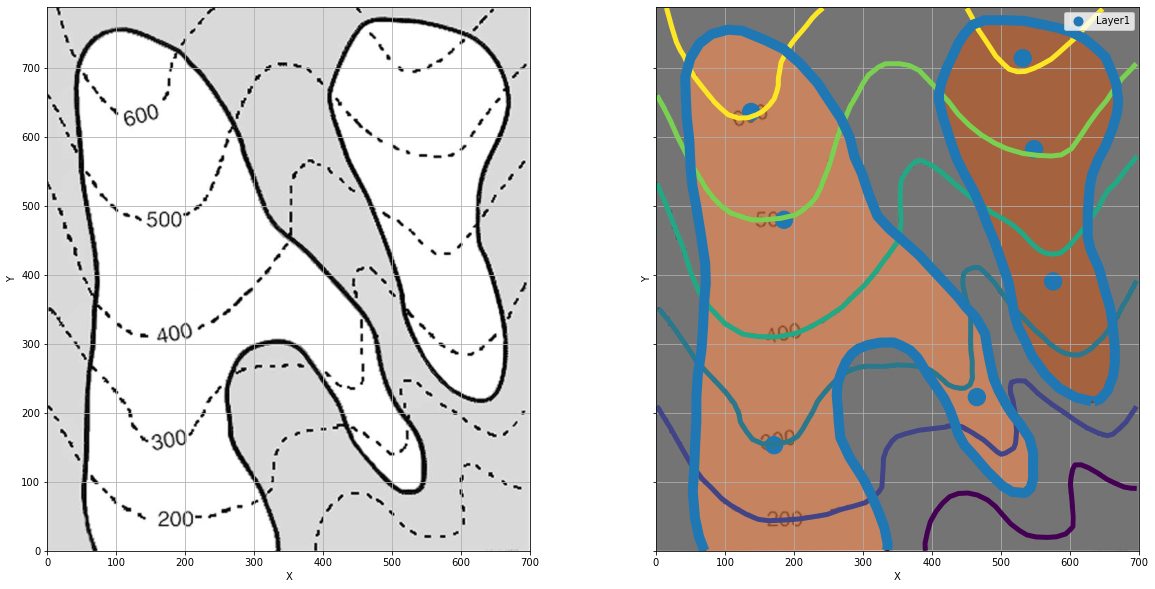

In [13]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the different elements on the geological map
geological_map.plot(ax=ax2, column = 'formation', alpha=0.75, legend=True, cmap=ListedColormap(cols))
topo.plot(ax=ax2, column = 'Z', legend = False, linewidth = 5)
interfaces.plot(ax=ax2, column = 'formation', legend = True, linewidth = 10)
orientations.plot(ax=ax2, column = 'formation', legend = False, s = 300)

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1]);

# Interpolate Topography

In [14]:
dem = gg.vector.interpolate_raster(topo, method='rbf')
dem

array([[178.76054106, 178.68111477, 178.60349027, ..., 101.30166076,
        101.51161368, 101.7254922 ],
       [178.77427402, 178.69591558, 178.61937469, ..., 101.19756029,
        101.4078783 , 101.62216444],
       [178.78860836, 178.71132216, 178.63586943, ..., 101.09403524,
        101.30473818, 101.51945228],
       ...,
       [594.08649835, 594.45287687, 594.81796228, ..., 571.97927958,
        571.49025176, 571.00585996],
       [594.41115553, 594.77055093, 595.12840092, ..., 572.69058009,
        572.20377342, 571.72152143],
       [594.7418941 , 595.09499932, 595.44639541, ..., 573.39668964,
        572.91215257, 572.43208875]])

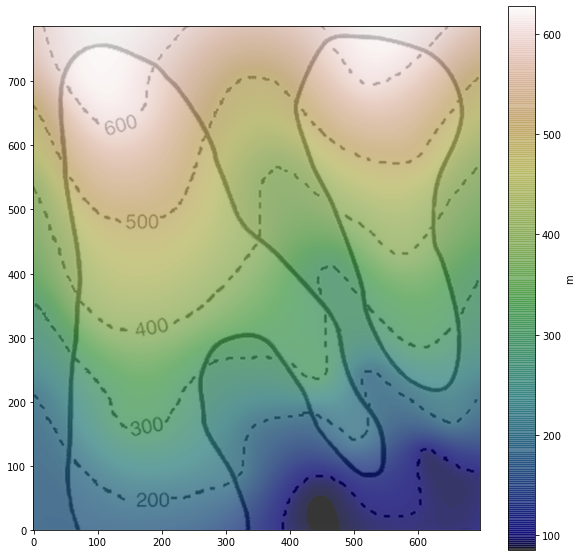

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
im = plt.imshow(dem,origin = 'lower', alpha=0.75, cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('m')

# Save Topography as Raster

In [16]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example3/topo.tif',dem, crs='EPSG:4326', extent=[0,705,0,795])

In [17]:
topography = rasterio.open('../../../gemgis/data/examples/example3/topo.tif')
topography

<open DatasetReader name='../../../gemgis/data/examples/example3/topo.tif' mode='r'>

# Set Interfaces

In [18]:
interfaces_coords = gg.vector.extract_coordinates(interfaces,np.flipud(dem), extent=geo_data.extent)
interfaces_coords.head()

id formation                                           geometry  \
0  None    Layer1  LINESTRING (70.166 0.062, 62.317 20.308, 56.38...   
0  None    Layer1  LINESTRING (70.166 0.062, 62.317 20.308, 56.38...   
0  None    Layer1  LINESTRING (70.166 0.062, 62.317 20.308, 56.38...   
0  None    Layer1  LINESTRING (70.166 0.062, 62.317 20.308, 56.38...   
0  None    Layer1  LINESTRING (70.166 0.062, 62.317 20.308, 56.38...   

                                     points          X           Y           Z  
0  (70.16589982172896, 0.06179706003696683)  70.165900    0.061797  177.250316  
0   (62.31698542002265, 20.307514503784773)  62.316985   20.307515  179.535422  
0    (56.38116928150073, 47.93188960998289)  56.381169   47.931890  183.090187  
0      (53.1849605915274, 86.5146945103753)  53.184961   86.514695  189.807694  
0   (55.01136555722646, 114.13906961657345)  55.011366  114.139070  198.815211

In [19]:
geo_data.to_gempy_df(interfaces_coords.sample(n=85), 'interfaces')
geo_data.interfaces.head()

index           X           Y           Z formation
0      0   53.184961   86.514695  189.807694    Layer1
1      0   69.622605  359.790538  395.921831    Layer1
2      0  269.385648  260.479767  305.272544    Layer1
3      1  665.030624  294.724861  282.990695    Layer1
4      0  437.186605  368.465961  305.657171    Layer1

# Set Orientations

In [20]:
orientations_coords = gg.vector.extract_coordinates(orientations,np.flipud(dem),extent=geo_data.extent)
orientations_coords

id   dip  azimuth formation                 geometry           X  \
0  None  36.0    166.0    Layer1  POINT (137.735 636.168)  137.735052   
1  None  28.0    163.0    Layer1  POINT (185.477 479.750)  185.477114   
2  None  30.0    174.0    Layer1  POINT (171.029 153.094)  171.028858   
3  None  40.0    154.0    Layer1  POINT (465.019 222.822)  465.019450   
4  None  37.0    183.0    Layer1  POINT (575.580 390.547)  575.580015   
5  None  29.0    183.0    Layer1  POINT (547.940 582.144)  547.939874   
6  None  47.0    183.0    Layer1  POINT (531.607 714.063)  531.607063   

            Y           Z  
0  636.167844  603.338238  
1  479.749772  497.998749  
2  153.093559  299.358151  
3  222.822097  264.508400  
4  390.547499  357.336770  
5  582.143932  506.671865  
6  714.062787  608.634597

In [21]:
geo_data.to_gempy_df(orientations_coords, 'orientations')
geo_data.orientations.head()

index           X           Y           Z formation   dip  azimuth  \
0      0  137.735052  636.167844  603.338238    Layer1  36.0    166.0   
1      1  185.477114  479.749772  497.998749    Layer1  28.0    163.0   
2      2  171.028858  153.093559  299.358151    Layer1  30.0    174.0   
3      3  465.019450  222.822097  264.508400    Layer1  40.0    154.0   
4      4  575.580015  390.547499  357.336770    Layer1  37.0    183.0   

   polarity  
0         1  
1         1  
2         1  
3         1  
4         1

# Check Data Class

In [22]:
vars(geo_data)

{'model_name': 'Model3',
 'crs': 'EPSG:4326',
 'extent': [0.0, 700.0, 0.0, 788.0, 100, 700],
 'resolution': [50, 50, 50],
 'interfaces':     index           X           Y           Z formation
 0       0   53.184961   86.514695  189.807694    Layer1
 1       0   69.622605  359.790538  395.921831    Layer1
 2       0  269.385648  260.479767  305.272544    Layer1
 3       1  665.030624  294.724861  282.990695    Layer1
 4       0  437.186605  368.465961  305.657171    Layer1
 ..    ...         ...         ...         ...       ...
 80      1  609.096972  222.125263  226.483682    Layer1
 81      1  654.528796  231.942190  238.674059    Layer1
 82      1  663.204219  313.673812  294.294053    Layer1
 83      0  287.421397  571.425213  471.076492    Layer1
 84      1  629.872329  436.727847  377.016965    Layer1
 
 [85 rows x 5 columns],
 'orientations':    index           X           Y           Z formation   dip  azimuth  \
 0      0  137.735052  636.167844  603.338238    Layer1  36.0   

# Add Section Dict

# Add Surface Colors

In [23]:
geo_data.to_surface_color_dict('../../../gemgis/data/examples/example3/style3.qml')
geo_data.surface_colors

{'Layer1': '#b35a2a', 'basement': '#525252'}

# Add Stack

In [24]:
geo_data.stack = {"Strat_Series": ('Layer1')}
geo_data.stack

{'Strat_Series': 'Layer1'}

# Add DEM

In [25]:
geo_data.dem = '../../../gemgis/data/examples/example3/raster3.tif'
geo_data.dem

'../../../gemgis/data/examples/example3/raster3.tif'

# Visualize Data Set

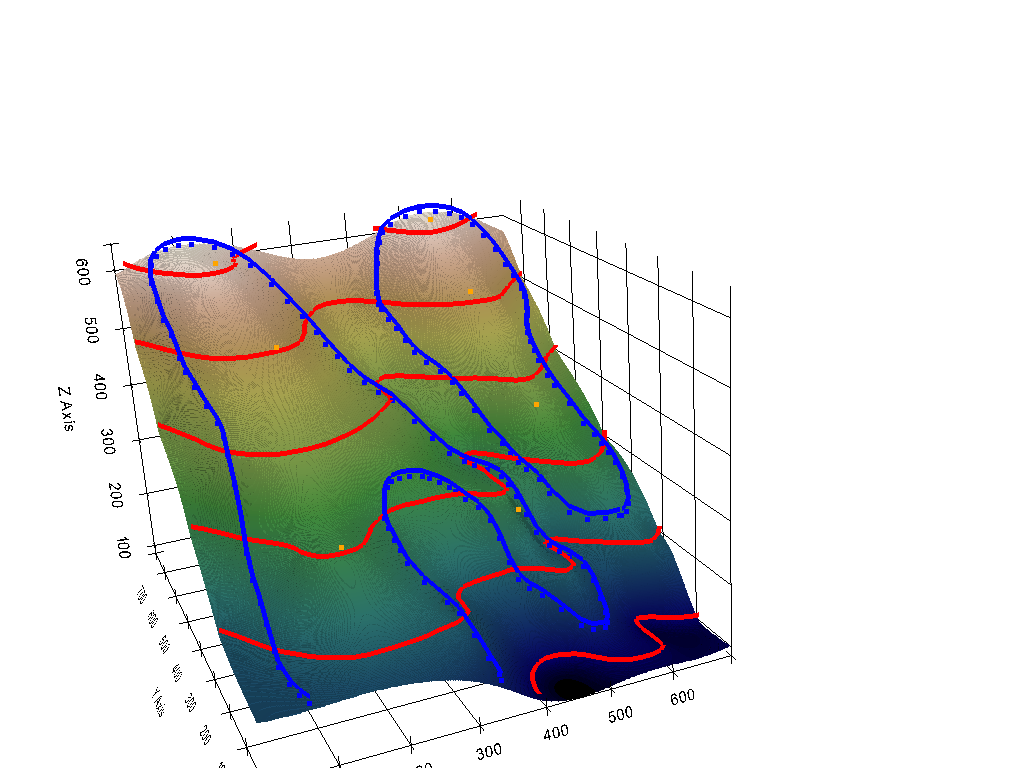

In [26]:
import pyvista as pv
p = pv.Plotter(notebook =True)
gg.visualization.plot_dem_3d(dem, p, cmap = 'gist_earth')
gg.visualization.plot_contours_3d(topo, p, color = 'red', add_to_z = 10)
gg.visualization.plot_points_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)
gg.visualization.plot_points_3d(orientations_coords, p, color = 'orange', add_to_z = 20)
gg.visualization.plot_contours_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)

p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192), 
                    (577.9371599370799, 495.3480261506809, 381.7124055285182), 
                    (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]
p.set_background('white')
p.show_grid(color='black')
p.show()

# Create GemPy Model

## Importing GemPy

Please see https://docs.gempy.org/installation.html for more information on how to install GemPy.

In [27]:
import sys  
sys.path.append('../../../gempy-master')
import gempy as gp
print(gp)
print(gp.__version__)

<module 'gempy' from '../../../gempy-master\\gempy\\__init__.py'>
2.2.2


## Creating GemPy Model

For more information on how to create a GemPy Model, please see the tutorials at: https://docs.gempy.org/tutorials/index.html. With the attributes of the GemPy Data Class, all necessary variables can be passed to the model.

In [28]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

Model3  2020-07-31 07:39

In [29]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             orientations_df = geo_data.orientations,
             default_values=True)

Active grids: ['regular']


Model3  2020-07-31 07:39

In [30]:
geo_model.surfaces

surface          series  order_surfaces    color  id
0  Layer1  Default series               1  #015482   1

In [31]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         remove_unused_series=True)
geo_model.add_surfaces('basement')

surface        series  order_surfaces    color  id
0    Layer1  Strat_Series               1  #015482   1
1  basement  Strat_Series               2  #9f0052   2

In [32]:
geo_model.surfaces.colors.change_colors(geo_data.surface_colors)

surface        series  order_surfaces    color  id
0    Layer1  Strat_Series               1  #b35a2a   1
1  basement  Strat_Series               2  #525252   2

A raster created with ArcGIS has to be loaded as the import of the created raster fails. This is due to a bug in `GemPy`described here: https://github.com/cgre-aachen/gempy/issues/492

In [33]:
geo_model.set_topography(
    source='gdal', filepath='../../../gemgis/data/examples/example3/topo.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  7.        ,   7.88      , 106.        ],
       [  7.        ,   7.88      , 118.        ],
       [  7.        ,   7.88      , 130.        ],
       ...,
       [699.49494949, 785.47435897, 568.39227295],
       [699.49494949, 786.48461538, 569.13482666],
       [699.49494949, 787.49487179, 569.87176514]])

In [34]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            1212.82
$C_o$            35022.5
drift equations      [3]


In [35]:
sol = gp.compute_model(geo_model)

../../../gempy-master\gempy\core\solution.py:315: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:0
  '; Surface Number:' + str(s_n))


The geological map had to be created manually as there seems to be a bug when creating the geological map with `GemGIS`. This was reported already: https://github.com/cgre-aachen/gempy/issues/446

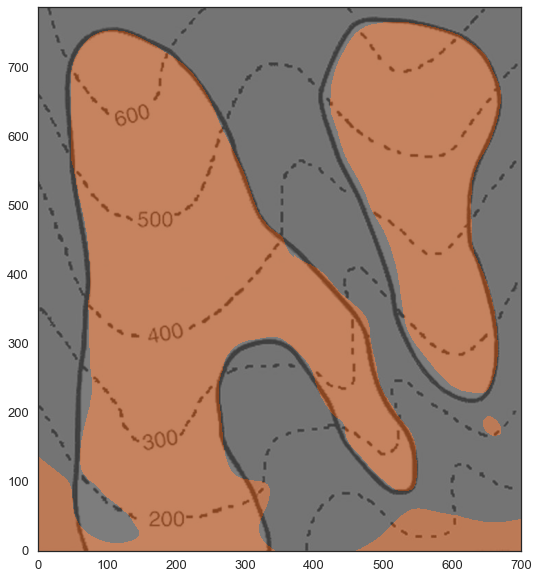

In [36]:
shape = geo_model._grid.topography.values_2d[:, :, 2].shape
geolmap = geo_model.solutions.geological_map[0].reshape(shape)
cols = ['#b35a2a','#525252', ]
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
gmap = np.rot90(geolmap,1)
plt.imshow(gmap, extent=geo_data.extent[:4], alpha=0.75, cmap=ListedColormap(cols))

../../../gempy-master\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


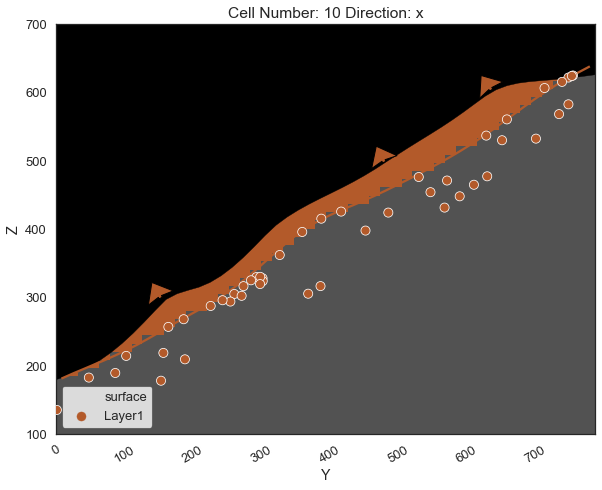

In [37]:
gp.plot_2d(geo_model, direction='x', show_topography=True, cell_number=10)

../../../gempy-master\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


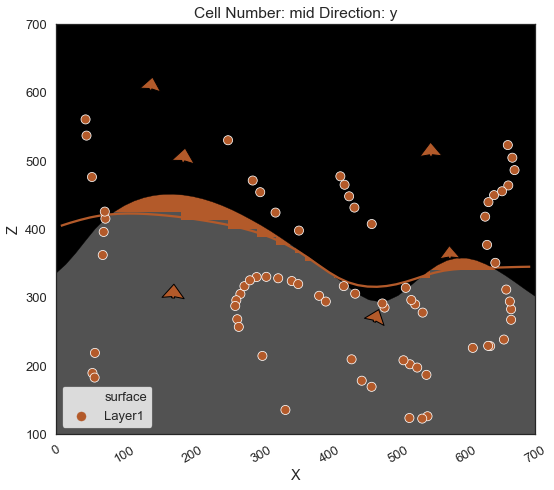

In [38]:
gp.plot_2d(geo_model, direction='y', show_topography=True)

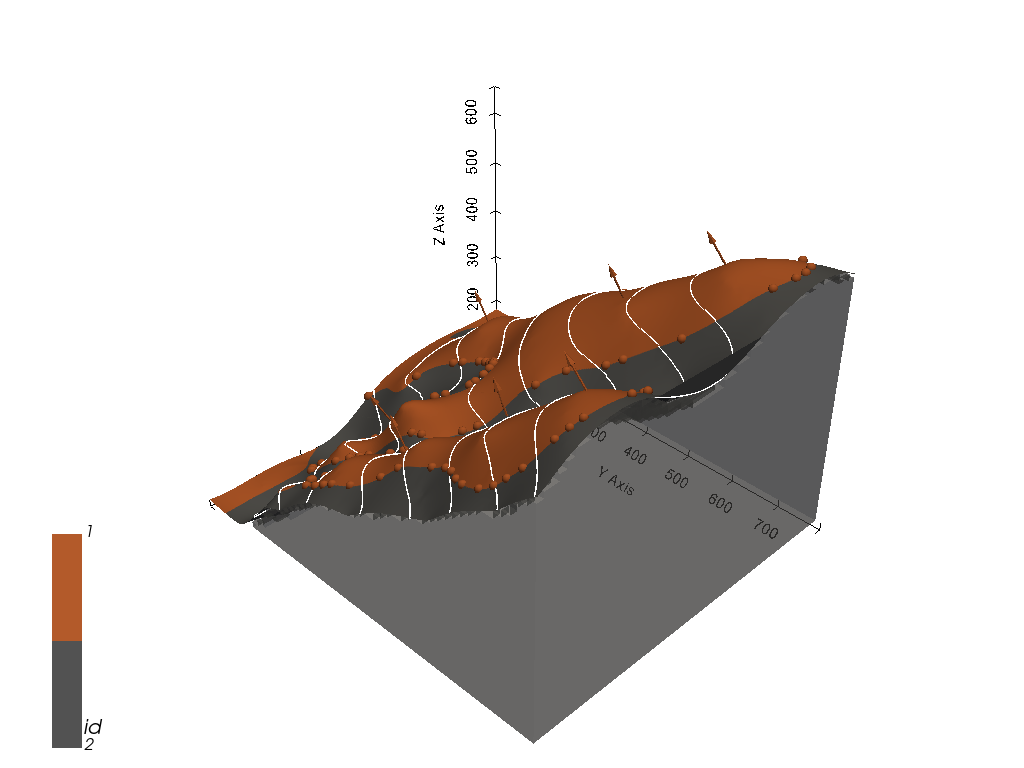

In [39]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True)

# Postprocessing - Converting Geological Map to Shape Files

## Create GeoDataFrame with Polygons

In [40]:
gdf = gg.post.extract_lithologies(geo_model, geo_data.extent[:4], geo_data.crs)
gdf

formation                                           geometry
0  basement  POLYGON ((343.939 0.895, 342.934 1.515, 342.92...
1    Layer1  POLYGON ((1.515 0.505, 2.525 0.505, 3.535 0.50...
2    Layer1  POLYGON ((461.111 0.505, 462.121 0.505, 463.13...
3    Layer1  POLYGON ((659.091 166.949, 660.101 166.635, 66...
4    Layer1  POLYGON ((635.859 228.777, 636.869 228.680, 63...

## Plot Polygons

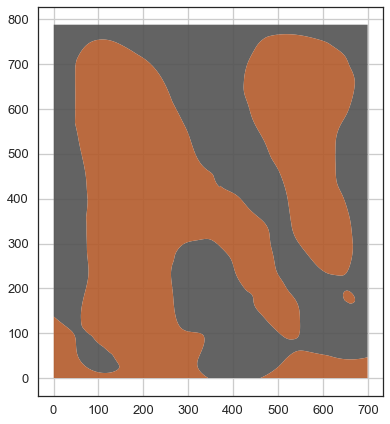

In [41]:
gdf.plot(column='formation', cmap=ListedColormap(cols), alpha=0.9)
plt.grid()

## Save Polygons as Shape Files

These polygons can now be saved as shape files and displayed for example as in QGIS shown below. 

In [42]:
gdf.to_file('../../../gemgis/data/examples/example3/liths.shp')

## Save Polygons as GeoTiff

Rasters like DEMs can be saved as georeferenced tif-files. The same can be done with the geological map obtained from `GemPy` by saving the array of the geological map as tif. 

In [43]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example3/geolmap.tif',gmap, extent=geo_data.extent, crs='EPSG:4326')